In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib

In [2]:
import re

In [5]:
# TEST THIS IN YOUR NOTEBOOK
pattern = r"\d{10}"
text_to_search = "Hello my name is sebastien, you can call me on 0664533519. See you!"
re.findall(pattern, text_to_search)

['0664533519']

In [9]:
text_to_search="I moved to Paris 75011, it's closer to my workplace."
pattern = r"\d{5}"
re.findall(pattern,text_to_search)

['75011']

In [10]:
# TEST THIS IN YOUR NOTEBOOK
pattern = r"date of"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [11]:
pattern = r"\d{4}/\d{2}/\d{2}"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['2019/03/12', '2021/03/01']

In [12]:
pattern=r'ES\d{18}'
text_to_search='ES092838498309300202020220209448 jbjsenkrl'
re.findall(pattern,text_to_search)

['ES092838498309300202']

In [13]:
pattern=r'\d{2}-\d{2}-\d{4}'
text_to_search="Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern,text_to_search)

['15-02-2017']

In [14]:
pattern = r"Receipt Number (\d+)"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern, text_to_search)

['103402']

1. Read the receipt text file

In [15]:
filepath = "receipts.txt"
with open(filepath) as f:
    receipts_str = f.read()

In [16]:
print(receipts_str[:500])




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 â‚¬

************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 â‚¬

************************************


Receipt Number 103086 ||| 23-01-2017 
-


In [17]:
receipts_str.split('************************************')

['\n\n\nReceipt Number 102790 ||| 02-01-2017 \n------------------------------------\n\nQuantity                         163\nTotal Amount               3097.00 â‚¬\n\n====================================\n',
 '\n\n\nReceipt Number 102862 ||| 05-01-2017 \n------------------------------------\n\nQuantity                         110\nTotal Amount                935.00 â‚¬\n\n====================================\n',
 '\n\n\nReceipt Number 103086 ||| 23-01-2017 \n------------------------------------\n\nQuantity                         156\nTotal Amount               2808.00 â‚¬\n\n====================================\n',
 '\n\n\nReceipt Number 103193 ||| 31-01-2017 \n------------------------------------\n\nQuantity                         182\nTotal Amount               4368.00 â‚¬\n\n====================================\n',
 '\n\n\nReceipt Number 103270 ||| 06-02-2017 \n------------------------------------\n\nQuantity                          97\nTotal Amount               1988.50 â‚¬\n\n=

In [19]:
len(receipts_str.split('************************************'))

100

In [20]:
receipts_list=receipts_str.split('************************************')
len(receipts_list)

100

In [21]:
receipts_dict = {
    "date": [],
    "quantity": [],
    "total_amount": []
}

In [23]:
for receipt in receipts_list:
    print(receipt)




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 â‚¬





Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 â‚¬





Receipt Number 103086 ||| 23-01-2017 
------------------------------------

Quantity                         156
Total Amount               2808.00 â‚¬





Receipt Number 103193 ||| 31-01-2017 
------------------------------------

Quantity                         182
Total Amount               4368.00 â‚¬





Receipt Number 103270 ||| 06-02-2017 
------------------------------------

Quantity                          97
Total Amount               1988.50 â‚¬





Receipt Number 103402 ||| 15-02-2017 
------------------------------------

Quantity                         163
Total Amount               3586.00 â‚¬





Receipt Number 103419 ||| 16-02-2017 
-----------------

In [27]:
receipt1=receipts_list[0]
date=re.findall(r'\d{2}-\d{2}-\d{4}', receipt1)
print(date)

['02-01-2017']


In [29]:
quantity=re.findall(r'Quantity +(\d+)',receipt1)
print(quantity)

['163']


In [32]:
total_amount=re.findall(r'Total Amount +(\d+.\d{2})',receipt1)
print(total_amount)

['3097.00']


In [35]:
for receipt in receipts_list:
    date=re.findall(r'\d{2}-\d{2}-\d{4}', receipt)[0]
    quantity=re.findall(r'Quantity +(\d+)',receipt)[0]
    total_amount=re.findall(r'Total Amount +(\d+.\d{2})',receipt)[0]
    receipts_dict['date'].append(date)
    receipts_dict['quantity'].append(quantity)
    receipts_dict['total_amount'].append(total_amount)

In [36]:
receipts_dict

{'date': ['02-01-2017',
  '05-01-2017',
  '23-01-2017',
  '31-01-2017',
  '06-02-2017',
  '15-02-2017',
  '16-02-2017',
  '17-02-2017',
  '21-02-2017',
  '27-02-2017',
  '28-02-2017',
  '01-03-2017',
  '08-03-2017',
  '09-03-2017',
  '17-03-2017',
  '21-03-2017',
  '21-03-2017',
  '22-03-2017',
  '22-03-2017',
  '27-03-2017',
  '31-03-2017',
  '07-04-2017',
  '11-04-2017',
  '14-04-2017',
  '17-04-2017',
  '18-04-2017',
  '19-04-2017',
  '20-04-2017',
  '24-04-2017',
  '02-05-2017',
  '05-05-2017',
  '12-05-2017',
  '15-05-2017',
  '15-05-2017',
  '17-05-2017',
  '18-05-2017',
  '19-05-2017',
  '22-05-2017',
  '24-05-2017',
  '30-05-2017',
  '02-06-2017',
  '12-06-2017',
  '14-06-2017',
  '15-06-2017',
  '16-06-2017',
  '19-06-2017',
  '19-06-2017',
  '30-06-2017',
  '03-07-2017',
  '04-07-2017',
  '05-07-2017',
  '05-07-2017',
  '07-07-2017',
  '11-07-2017',
  '11-07-2017',
  '13-07-2017',
  '13-07-2017',
  '19-07-2017',
  '20-07-2017',
  '21-07-2017',
  '24-07-2017',
  '25-07-2017',


In [41]:
receipts_df=pd.DataFrame.from_dict(receipts_dict)
receipts_df

,date,quantity,total_amount
0,02-01-2017,163,3097.00
1,05-01-2017,110,935.00
2,23-01-2017,156,2808.00
3,31-01-2017,182,4368.00
4,06-02-2017,97,1988.50
5,15-02-2017,163,3586.00
6,16-02-2017,223,5017.50
7,17-02-2017,104,2756.00
8,21-02-2017,153,3060.00
9,27-02-2017,158,2686.00


# PART 3: Data visualization

In [42]:
receipts_df.dtypes

date            object
quantity        object
total_amount    object
dtype: object

In [46]:
receipts_df['date']=pd.to_datetime(receipts_df['date'])
receipts_df.dtypes

date            datetime64[ns]
quantity                object
total_amount            object
dtype: object

In [51]:
receipts_df=receipts_df.sort_values(by='date')

In [54]:
receipts_df=receipts_df.set_index('date')

In [55]:
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-01-03 to 2017-12-15
Data columns (total 2 columns):
quantity        100 non-null object
total_amount    100 non-null object
dtypes: object(2)
memory usage: 1.6+ KB


In [60]:
receipts_df['total_amount']=pd.to_numeric(receipts_df['total_amount'])
receipts_df['quantity']=pd.to_numeric(receipts_df['quantity'])
receipts_df.dtypes

quantity          int64
total_amount    float64
dtype: object

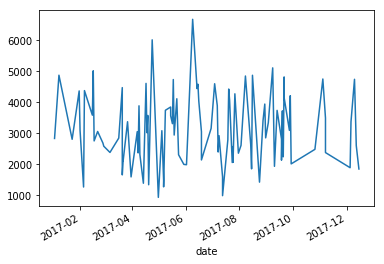

In [61]:
receipts_df['total_amount'].plot()